# 1) Preparación previa

### Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

### Lectura del data set con dummies

In [2]:
data_con_dummies = pd.read_csv("data_con_dummies.csv", sep = ";")
data_con_dummies.head(5)

,property_type,price,surface_covered_in_m2,Partido,precio_usd_por_m2,ambientes_train,ambientes_imputados,ambientes_final,balcon,parrilla,...,prop_PH,prop_apartment,prop_house,amb_1.0,amb_2.0,amb_3.0,amb_4.0,amb_5.0,amb_6.0,amb_7.0
0,apartment,64000.0,35.0,Mar del Plata,1828.571429,2,0.0,2.0,NaN,NaN,...,0,1,0,0,1,0,0,0,0,0
1,PH,130000.0,78.0,Vicente López,1666.666667,0,3.0,3.0,NaN,NaN,...,1,0,0,0,0,1,0,0,0,0
2,apartment,138000.0,40.0,Belgrano,3450.000000,0,1.0,1.0,NaN,NaN,...,0,1,0,1,0,0,0,0,0,0
3,apartment,195000.0,60.0,Belgrano,3250.000000,0,2.0,2.0,NaN,NaN,...,0,1,0,0,1,0,0,0,0,0
4,apartment,115000.0,36.0,San Isidro,3194.444444,2,0.0,2.0,balcon,NaN,...,0,1,0,0,1,0,0,0,0,0


# 2) Gráficos

Se trabajará con distintos subconjuntos de datos

### Datos de PHs y departamentos en Palermo

In [3]:
dataset_test_Palermo = data_con_dummies[['ambientes_imputados','ambientes_train','partido_Palermo', 
                                 'prop_PH', 'prop_apartment', 'surface_covered_in_m2', 
                                 'amb_1.0', 'amb_2.0', 'amb_3.0', 'amb_4.0', 
                                 'dummy_amenities', 'precio_usd_por_m2']].copy()

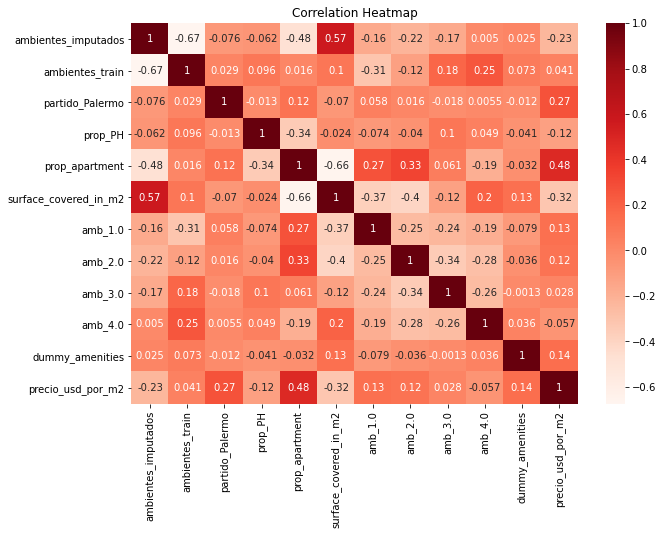

In [4]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset_test_Palermo.corr(),annot=True, cmap='Reds')
plt.title("Correlation Heatmap")
plt.show()

In [5]:
X_train_Palermo = dataset_test_Palermo[dataset_test_Palermo.ambientes_imputados == 0]
X_test_Palermo = dataset_test_Palermo[dataset_test_Palermo.ambientes_train == 0]

In [6]:
Y_train_Palermo = X_train_Palermo["precio_usd_por_m2"]
Y_test_Palermo = X_test_Palermo["precio_usd_por_m2"]

In [7]:
X_train_Palermo.drop(["precio_usd_por_m2"], axis = 1, inplace = True)
X_test_Palermo.drop(["precio_usd_por_m2"], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
lm_Palermo = linear_model.LinearRegression()
# Fiteamos el modelo sobre los vectores X e Y.
model_Palermo = lm_Palermo.fit(X_train_Palermo, Y_train_Palermo)

In [9]:
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions_Palermo = lm_Palermo.predict(X_test_Palermo)

In [10]:
# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto =', model_Palermo.intercept_)
print ('RM =', model_Palermo.coef_)

Intercepto = 1593.7589872407973
RM = [ 0.00000000e+00 -6.99542074e-01  8.79920459e+02  2.46245761e+02
  9.12524809e+02 -1.91486190e+00 -1.97959581e+02 -2.14216308e+02
 -1.43399746e+02  6.10638228e+00  9.78202224e+01]


In [11]:
# Imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
R2_train_Palermo = model_Palermo.score(X_train_Palermo, Y_train_Palermo)
R2_train_Palermo

0.3041662677607303

In [12]:
#media del precio_usd_por_m2
dataset_test_Palermo.precio_usd_por_m2.mean()


2144.7300796479353

In [13]:
# Error absoluto de la media
MAE_Test_Palermo = mean_absolute_error(Y_test_Palermo, predictions_Palermo)
MAE_Test_Palermo

546.7988077600204

In [14]:
# Raiz cuadrada de la media del error
MSE_Test_Palermo = mean_squared_error(Y_test_Palermo, predictions_Palermo)
MSE_Test_Palermo

485497.1668630618

In [15]:
RMSE_Test_Palermo = np.sqrt(mean_squared_error(Y_test_Palermo, predictions_Palermo))
RMSE_Test_Palermo

696.7762674367302

In [16]:
# Carga de los datos de la regresión lineal simple en base a la superficie obtenida en la notebook 2

revision_datos = [ {'subconjunto': 'Superficie Cubierta',
    'R2_train': 0.0838,
    'MAE': 630.7234,
    'MSE': 616548.9624,
    'RMSE': 785.2063}]

# Se procede a agregar los nuevos datos obtenidos. Se analizarán al final

revision_datos.append({
    'subconjunto': 'PHs y departamentos en Palermo',
    'R2_train': R2_train_Palermo.round(4),
    'MAE': MAE_Test_Palermo.round(4),
    'MSE': MSE_Test_Palermo.round(4),
    'RMSE': RMSE_Test_Palermo.round(4),
})

In [17]:
dataset_test_Palermo.columns

Index(['ambientes_imputados', 'ambientes_train', 'partido_Palermo', 'prop_PH',
       'prop_apartment', 'surface_covered_in_m2', 'amb_1.0', 'amb_2.0',
       'amb_3.0', 'amb_4.0', 'dummy_amenities', 'precio_usd_por_m2'],
      dtype='object')

## Departamentos en Rosario

In [18]:
dataset_test_Rosario = data_con_dummies[['ambientes_imputados','ambientes_train','partido_Rosario', 
                                   'prop_apartment', 'surface_covered_in_m2', 
                                   'amb_1.0', 'amb_2.0', 'amb_3.0', 'amb_4.0', 'dummy_amenities', 
                                   'precio_usd_por_m2']].copy()

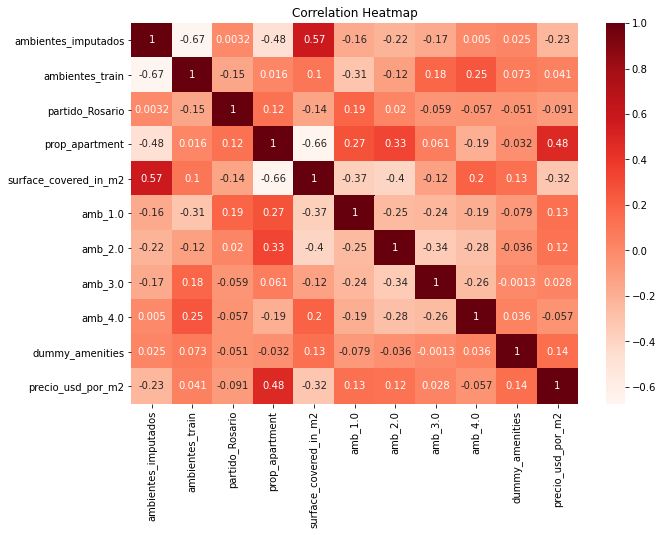

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset_test_Rosario.corr(),annot=True, cmap='Reds')
plt.title("Correlation Heatmap")
plt.show()

In [20]:
X_train_Rosario = dataset_test_Rosario[dataset_test_Rosario.ambientes_imputados == 0]
X_test_Rosario = dataset_test_Rosario[dataset_test_Rosario.ambientes_train == 0]

In [21]:
Y_train_Rosario = X_train_Rosario["precio_usd_por_m2"]
Y_test_Rosario = X_test_Rosario["precio_usd_por_m2"]

In [22]:
X_train_Rosario.drop(["precio_usd_por_m2"], axis = 1, inplace = True)
X_test_Rosario.drop(["precio_usd_por_m2"], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
lm_Rosario = linear_model.LinearRegression()
# Fiteamos el modelo sobre los vectores X e Y.
model_Rosario = lm_Rosario.fit(X_train_Rosario, Y_train_Rosario)

In [24]:
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions_Rosario = lm_Rosario.predict(X_test_Rosario)

In [25]:
# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto =', model_Rosario.intercept_)
print ('RM =', model_Rosario.coef_)

Intercepto = 1736.6765533929301
RM = [   0.            6.90998092 -660.24955002  873.46690512   -2.43768079
 -167.48544863 -228.62370865 -161.55689339    6.51610357   95.35912435]


In [26]:
# Imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
R2_train_Rosario = model_Rosario.score(X_train_Rosario, Y_train_Rosario)
R2_train_Rosario

0.2709089513974754

In [27]:
#media del precio_usd_por_m2
dataset_test_Rosario.precio_usd_por_m2.mean()


2144.7300796479353

In [28]:
# Error absoluto de la media
MAE_Test_Rosario = mean_absolute_error(Y_test_Rosario, predictions_Rosario)
MAE_Test_Rosario

543.3963955500305

In [29]:
# Raiz cuadrada de la media del error
MSE_Test_Rosario = mean_squared_error(Y_test_Rosario, predictions_Rosario)
MSE_Test_Rosario

496336.43202655204

In [30]:
RMSE_Test_Rosario = np.sqrt(mean_squared_error(Y_test_Rosario, predictions_Rosario))
RMSE_Test_Rosario

704.5114846661849

In [31]:
revision_datos.append({
    'subconjunto': 'Departamentos en Rosario',
    'R2_train': R2_train_Rosario.round(4),
    'MAE': MAE_Test_Rosario.round(4),
    'MSE': MSE_Test_Rosario.round(4),
    'RMSE': RMSE_Test_Rosario.round(4),
})

In [32]:
data_con_dummies.columns

Index(['property_type', 'price', 'surface_covered_in_m2', 'Partido',
       'precio_usd_por_m2', 'ambientes_train', 'ambientes_imputados',
       'ambientes_final', 'balcon', 'parrilla', 'pileta', 'patio', 'quincho',
       'gimnasio', 'sala_usos_multiples', 'cochera', 'seguridad', 'jardin',
       'frente', 'dummy_amenities', 'partido_Almagro',
       'partido_Almirante Brown', 'partido_Avellaneda', 'partido_Bahía Blanca',
       'partido_Balvanera', 'partido_Barracas', 'partido_Barrio Norte',
       'partido_Belgrano', 'partido_Boedo', 'partido_Caballito',
       'partido_Colegiales', 'partido_Córdoba', 'partido_Escobar',
       'partido_Esteban Echeverría', 'partido_Ezeiza', 'partido_Flores',
       'partido_Floresta', 'partido_General San Martín', 'partido_Ituzaingó',
       'partido_La Matanza', 'partido_La Plata', 'partido_Lanús',
       'partido_Lomas de Zamora', 'partido_Mar del Plata', 'partido_Monserrat',
       'partido_Moreno', 'partido_Morón', 'partido_Nuñez', 'partido_Pal

## Departamentos en Córdoba

In [33]:
dataset_test_Cordoba = data_con_dummies[['ambientes_imputados','ambientes_train','partido_Córdoba', 
                                   'prop_apartment', 'surface_covered_in_m2', 
                                   'amb_1.0', 'amb_2.0', 'amb_3.0', 'amb_4.0', 'dummy_amenities', 
                                   'precio_usd_por_m2']].copy()

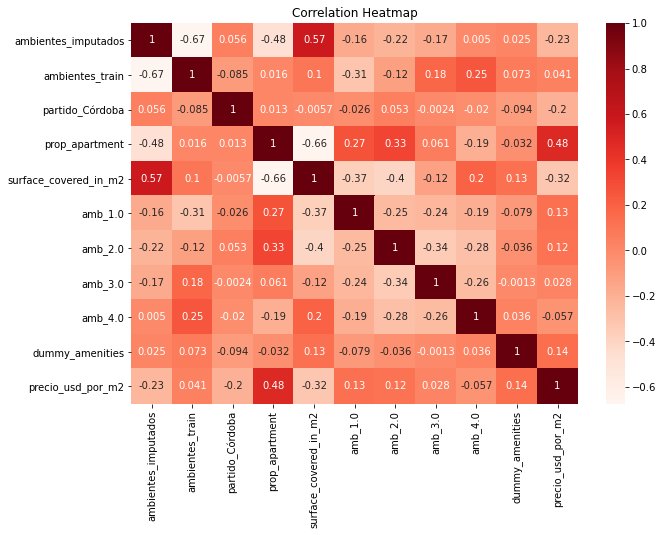

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset_test_Cordoba.corr(),annot=True, cmap='Reds')
plt.title("Correlation Heatmap")
plt.show()

In [35]:
X_train_Cordoba = dataset_test_Cordoba[dataset_test_Cordoba.ambientes_imputados == 0]
X_test_Cordoba = dataset_test_Cordoba[dataset_test_Cordoba.ambientes_train == 0]

In [36]:
Y_train_Cordoba = X_train_Cordoba["precio_usd_por_m2"]
Y_test_Cordoba = X_test_Cordoba["precio_usd_por_m2"]

In [37]:
X_train_Cordoba.drop(["precio_usd_por_m2"], axis = 1, inplace = True)
X_test_Cordoba.drop(["precio_usd_por_m2"], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
lm_Cordoba = linear_model.LinearRegression()
# Fiteamos el modelo sobre los vectores X e Y.
model_Cordoba = lm_Cordoba.fit(X_train_Cordoba, Y_train_Cordoba)

In [39]:
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions_Cordoba = lm_Cordoba.predict(X_test_Cordoba)

In [40]:
# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto =', model_Cordoba.intercept_)
print ('RM =', model_Cordoba.coef_)

Intercepto = 1597.4025444284566
RM = [   0.           28.51663871 -702.98289226  859.55220729   -2.13657376
  -72.04363407 -130.75211031  -84.0292395    42.43494886   88.60355416]


In [41]:
# Imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
R2_train_Cordoba = model_Cordoba.score(X_train_Cordoba, Y_train_Cordoba)
R2_train_Cordoba

0.26668679477838786

In [42]:
#media del precio_usd_por_m2
dataset_test_Cordoba.precio_usd_por_m2.mean()


2144.7300796479353

In [43]:
# Error absoluto de la media
MAE_Test_Cordoba = mean_absolute_error(Y_test_Cordoba, predictions_Cordoba)
MAE_Test_Cordoba

532.8317592990717

In [44]:
# Raiz cuadrada de la media del error
MSE_Test_Cordoba = mean_squared_error(Y_test_Cordoba, predictions_Cordoba)
MSE_Test_Cordoba

477872.54317171

In [45]:
RMSE_Test_Cordoba = np.sqrt(mean_squared_error(Y_test_Cordoba, predictions_Cordoba))
RMSE_Test_Cordoba

691.2832582752962

In [46]:
revision_datos.append({
    'subconjunto': 'Departamentos en Córdoba',
    'R2_train': R2_train_Cordoba.round(4),
    'MAE': MAE_Test_Cordoba.round(4),
    'MSE': MSE_Test_Cordoba.round(4),
    'RMSE': RMSE_Test_Cordoba.round(4),
})

## PHs y casas en Pinamar

In [47]:
dataset_test_Pinamar = data_con_dummies[['ambientes_imputados','ambientes_train','partido_Pinamar', 
                                   'prop_PH', 'prop_house','surface_covered_in_m2', 
                                   'amb_1.0', 'amb_2.0', 'amb_3.0', 'amb_4.0', 'dummy_amenities', 
                                   'precio_usd_por_m2']].copy()

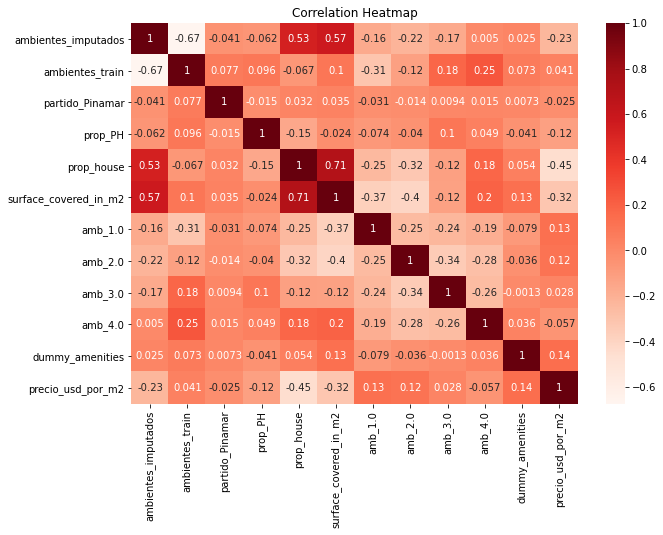

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset_test_Pinamar.corr(),annot=True, cmap='Reds')
plt.title("Correlation Heatmap")
plt.show()

In [49]:
X_train_Pinamar = dataset_test_Pinamar[dataset_test_Pinamar.ambientes_imputados == 0]
X_test_Pinamar = dataset_test_Pinamar[dataset_test_Pinamar.ambientes_train == 0]

In [50]:
Y_train_Pinamar = X_train_Pinamar["precio_usd_por_m2"]
Y_test_Pinamar = X_test_Pinamar["precio_usd_por_m2"]

In [51]:
X_train_Pinamar.drop(["precio_usd_por_m2"], axis = 1, inplace = True)
X_test_Pinamar.drop(["precio_usd_por_m2"], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
lm_Pinamar = linear_model.LinearRegression()
# Fiteamos el modelo sobre los vectores X e Y.
model_Pinamar = lm_Pinamar.fit(X_train_Pinamar, Y_train_Pinamar)

In [53]:
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions_Pinamar = lm_Pinamar.predict(X_test_Pinamar)

In [54]:
# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto =', model_Pinamar.intercept_)
print ('RM =', model_Pinamar.coef_)

Intercepto = 2605.850341420781
RM = [ 0.00000000e+00 -8.38104518e+00 -1.10886510e+02 -6.94315755e+02
 -9.75835131e+02 -1.78612977e+00 -2.20882065e+02 -2.54239510e+02
 -1.76833070e+02 -5.83349790e-02  9.58545082e+01]


In [55]:
# Imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
R2_train_Pinamar = model_Pinamar.score(X_train_Pinamar, Y_train_Pinamar)
R2_train_Pinamar

0.257537992466232

In [56]:
#media del precio_usd_por_m2
dataset_test_Pinamar.precio_usd_por_m2.mean()


2144.7300796479353

In [57]:
# Error absoluto de la media
MAE_Test_Pinamar = mean_absolute_error(Y_test_Pinamar, predictions_Pinamar)
MAE_Test_Pinamar

565.6569598237195

In [58]:
# Raiz cuadrada de la media del error
MSE_Test_Pinamar = mean_squared_error(Y_test_Pinamar, predictions_Pinamar)
MSE_Test_Pinamar

512502.83184315555

In [59]:
RMSE_Test_Pinamar = np.sqrt(mean_squared_error(Y_test_Pinamar, predictions_Pinamar))
RMSE_Test_Pinamar

715.8930310061382

In [60]:
revision_datos.append({
    'subconjunto': 'PHs y casas en Pinamar',
    'R2_train': R2_train_Pinamar.round(4),
    'MAE': MAE_Test_Pinamar.round(4),
    'MSE': MSE_Test_Pinamar.round(4),
    'RMSE': RMSE_Test_Pinamar.round(4),
})

## Propiedades en Mar del Plata

In [61]:
dataset_test_Mardel = data_con_dummies[['ambientes_imputados','ambientes_train','partido_Mar del Plata', 
                                   'prop_PH', 'prop_apartment', 'prop_house','surface_covered_in_m2', 
                                   'amb_1.0', 'amb_2.0', 'amb_3.0', 'amb_4.0', 'dummy_amenities', 
                                   'precio_usd_por_m2']].copy()

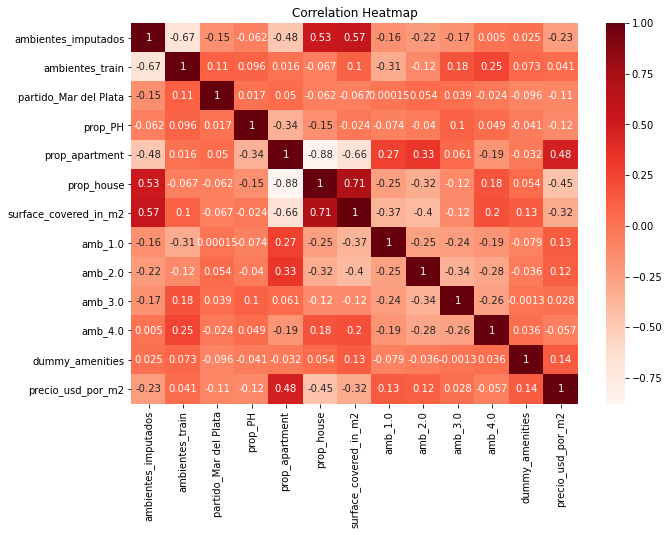

In [62]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset_test_Mardel.corr(),annot=True, cmap='Reds')
plt.title("Correlation Heatmap")
plt.show()

In [63]:
X_train_Mardel = dataset_test_Mardel[dataset_test_Mardel.ambientes_imputados == 0]
X_test_Mardel = dataset_test_Mardel[dataset_test_Mardel.ambientes_train == 0]

In [64]:
Y_train_Mardel = X_train_Mardel["precio_usd_por_m2"]
Y_test_Mardel = X_test_Mardel["precio_usd_por_m2"]

In [65]:
X_train_Mardel.drop(["precio_usd_por_m2"], axis = 1, inplace = True)
X_test_Mardel.drop(["precio_usd_por_m2"], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
lm_Mardel = linear_model.LinearRegression()
# Fiteamos el modelo sobre los vectores X e Y.
model_Mardel = lm_Mardel.fit(X_train_Mardel, Y_train_Mardel)

In [67]:
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions_Mardel = lm_Mardel.predict(X_test_Mardel)

In [68]:
# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto =', model_Mardel.intercept_)
print ('RM =', model_Mardel.coef_)

Intercepto = 2103.2647446746328
RM = [   0.          -13.12254674 -404.34184073 -136.68959979  552.88795755
 -416.19835776   -1.68752908 -200.07088183 -229.46000357 -157.51459458
    7.93124659   85.99964885]


In [69]:
# Imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
R2_train_Mardel = model_Mardel.score(X_train_Mardel, Y_train_Mardel)
R2_train_Mardel

0.278405891815094

In [70]:
#media del precio_usd_por_m2
dataset_test_Mardel.precio_usd_por_m2.mean()


2144.7300796479353

In [71]:
# Error absoluto de la media
MAE_Test_Mardel = mean_absolute_error(Y_test_Mardel, predictions_Mardel)
MAE_Test_Mardel

572.0314740280455

In [72]:
# Raiz cuadrada de la media del error
MSE_Test_Mardel = mean_squared_error(Y_test_Mardel, predictions_Mardel)
MSE_Test_Mardel

517803.5704306618

In [73]:
RMSE_Test_Mardel = np.sqrt(mean_squared_error(Y_test_Mardel, predictions_Mardel))
RMSE_Test_Mardel

719.5856935978243

In [74]:
revision_datos.append({
    'subconjunto': 'Propiedades en Mar del Plata',
    'R2_train': R2_train_Mardel.round(4),
    'MAE': MAE_Test_Mardel.round(4),
    'MSE': MSE_Test_Mardel.round(4),
    'RMSE': RMSE_Test_Mardel.round(4),
})

## Casas en Punilla

In [75]:
dataset_test_Punilla = data_con_dummies[['ambientes_imputados','ambientes_train','partido_Punilla', 
                                   'prop_house','surface_covered_in_m2', 
                                   'amb_1.0', 'amb_2.0', 'amb_3.0', 'amb_4.0', 'dummy_amenities', 
                                   'precio_usd_por_m2']].copy()

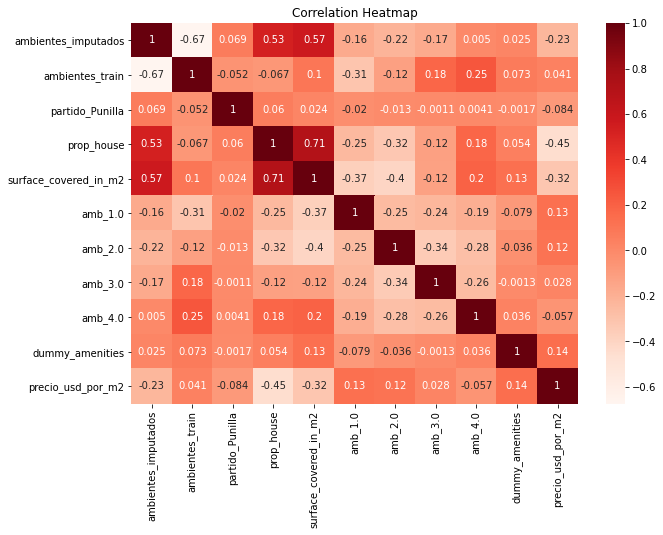

In [76]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset_test_Punilla.corr(),annot=True, cmap='Reds')
plt.title("Correlation Heatmap")
plt.show()

In [77]:
X_train_Punilla = dataset_test_Punilla[dataset_test_Punilla.ambientes_imputados == 0]
X_test_Punilla = dataset_test_Punilla[dataset_test_Punilla.ambientes_train == 0]

In [78]:
Y_train_Punilla = X_train_Punilla["precio_usd_por_m2"]
Y_test_Punilla = X_test_Punilla["precio_usd_por_m2"]

In [79]:
X_train_Punilla.drop(["precio_usd_por_m2"], axis = 1, inplace = True)
X_test_Punilla.drop(["precio_usd_por_m2"], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
lm_Punilla = linear_model.LinearRegression()
# Fiteamos el modelo sobre los vectores X e Y.
model_Punilla = lm_Punilla.fit(X_train_Punilla, Y_train_Punilla)

In [81]:
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions_Punilla = lm_Punilla.predict(X_test_Punilla)

In [82]:
# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto =', model_Punilla.intercept_)
print ('RM =', model_Punilla.coef_)

Intercepto = 2460.473083446903
RM = [   0.            2.08941487 -802.0865601  -874.03895503   -2.00835544
 -103.05895157 -167.25404713 -145.94451386   16.26337362  103.34732951]


In [83]:
# Imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
R2_train_Punilla = model_Punilla.score(X_train_Punilla, Y_train_Punilla)
R2_train_Punilla

0.22117457203844393

In [84]:
#media del precio_usd_por_m2
dataset_test_Punilla.precio_usd_por_m2.mean()


2144.7300796479353

In [85]:
# Error absoluto de la media
MAE_Test_Punilla = mean_absolute_error(Y_test_Punilla, predictions_Punilla)
MAE_Test_Punilla

571.6676022106686

In [86]:
# Raiz cuadrada de la media del error
MSE_Test_Punilla = mean_squared_error(Y_test_Punilla, predictions_Punilla)
MSE_Test_Punilla

528847.3305333493

In [87]:
RMSE_Test_Punilla = np.sqrt(mean_squared_error(Y_test_Punilla, predictions_Punilla))
RMSE_Test_Punilla

727.2189013861984

In [88]:
revision_datos.append({
    'subconjunto': 'Casas en Punilla',
    'R2_train': R2_train_Punilla.round(4),
    'MAE': MAE_Test_Punilla.round(4),
    'MSE': MSE_Test_Punilla.round(4),
    'RMSE': RMSE_Test_Punilla.round(4),
})

# 3) Resumen de datos

In [89]:
revision_datos

[{'subconjunto': 'Superficie Cubierta',
  'R2_train': 0.0838,
  'MAE': 630.7234,
  'MSE': 616548.9624,
  'RMSE': 785.2063},
 {'subconjunto': 'PHs y departamentos en Palermo',
  'R2_train': 0.3042,
  'MAE': 546.7988,
  'MSE': 485497.1669,
  'RMSE': 696.7763},
 {'subconjunto': 'Departamentos en Rosario',
  'R2_train': 0.2709,
  'MAE': 543.3964,
  'MSE': 496336.432,
  'RMSE': 704.5115},
 {'subconjunto': 'Departamentos en Córdoba',
  'R2_train': 0.2667,
  'MAE': 532.8318,
  'MSE': 477872.5432,
  'RMSE': 691.2833},
 {'subconjunto': 'PHs y casas en Pinamar',
  'R2_train': 0.2575,
  'MAE': 565.657,
  'MSE': 512502.8318,
  'RMSE': 715.893},
 {'subconjunto': 'Propiedades en Mar del Plata',
  'R2_train': 0.2784,
  'MAE': 572.0315,
  'MSE': 517803.5704,
  'RMSE': 719.5857},
 {'subconjunto': 'Casas en Punilla',
  'R2_train': 0.2212,
  'MAE': 571.6676,
  'MSE': 528847.3305,
  'RMSE': 727.2189}]